<a href="https://colab.research.google.com/github/vishalraut88/TimeSeriesForecasting_EnergyConsu/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

In [12]:
df_org = pd.read_csv("Alcohol_Sales.csv")

In [13]:
df_org = df_org.rename(columns={"S4248SM144NCEN":"sales"})

In [14]:
df_org["Sale_LastMonth"] = df_org["sales"].shift(+1)
df_org["Sale_Last2Month"] = df_org["sales"].shift(+2)
df_org["Sale_Last3Month"] = df_org["sales"].shift(+3)


In [15]:
df_org = df_org.dropna()

In [24]:
df_org[["Sale_LastMonth","Sale_Last2Month","Sale_Last3Month"]].head()

,Sale_LastMonth,Sale_Last2Month,Sale_Last3Month
3,4002.0,3458.0,3459.0
4,4564.0,4002.0,3458.0
5,4221.0,4564.0,4002.0
6,4529.0,4221.0,4564.0
7,4466.0,4529.0,4221.0


In [32]:
x = df_org[["Sale_LastMonth","Sale_Last2Month","Sale_Last3Month"]].to_numpy()
# y=df_org[["sales"]].to_numpy()

In [29]:
from sklearn.model_selection import train_test_split

In [33]:
x.shape

(322, 3)

In [31]:
y.shape

(322, 1)

In [45]:
X_train ,X_test , y_train,y_test= x[:-30],x[-30:],y[:-30],y[-30:]

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

<ipython-input-47-644a1df66e4e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor()

In [49]:
preds = rf.predict(X_test)

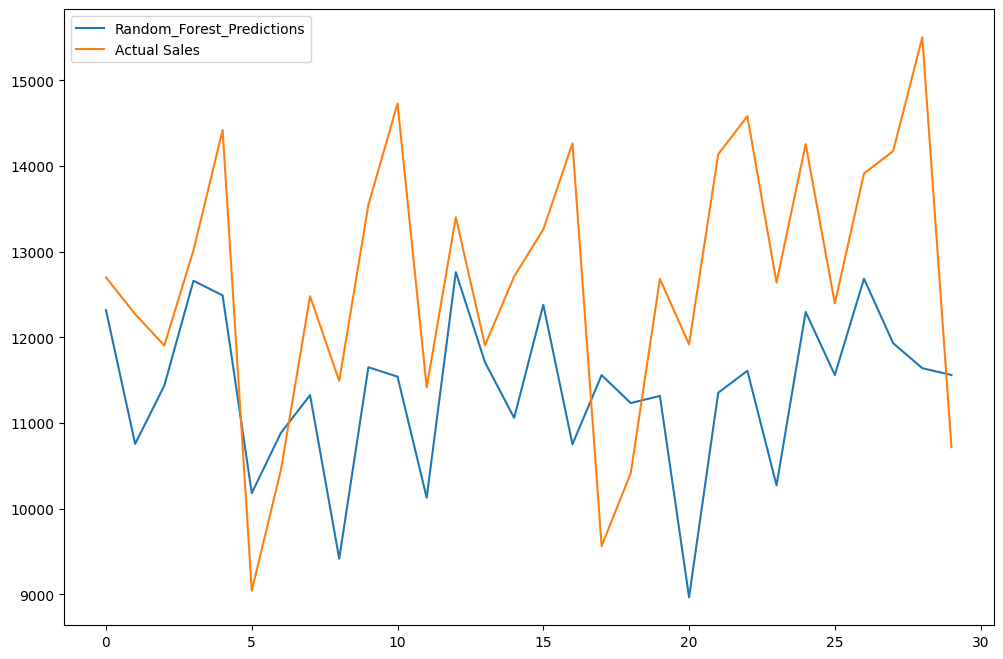

In [50]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(preds,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [52]:
df = pd.read_csv('monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

<Axes: xlabel='Date'>

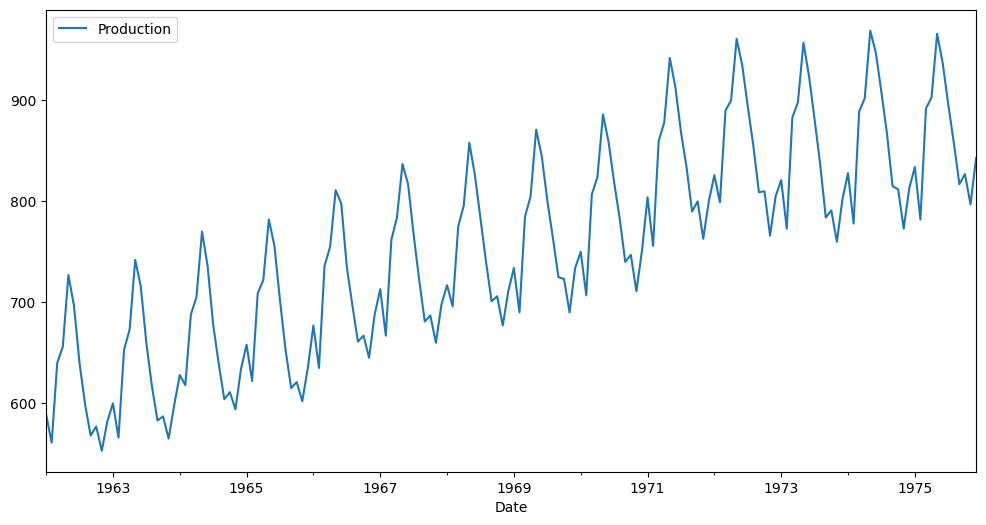

In [53]:
df.plot(figsize=(12,6))

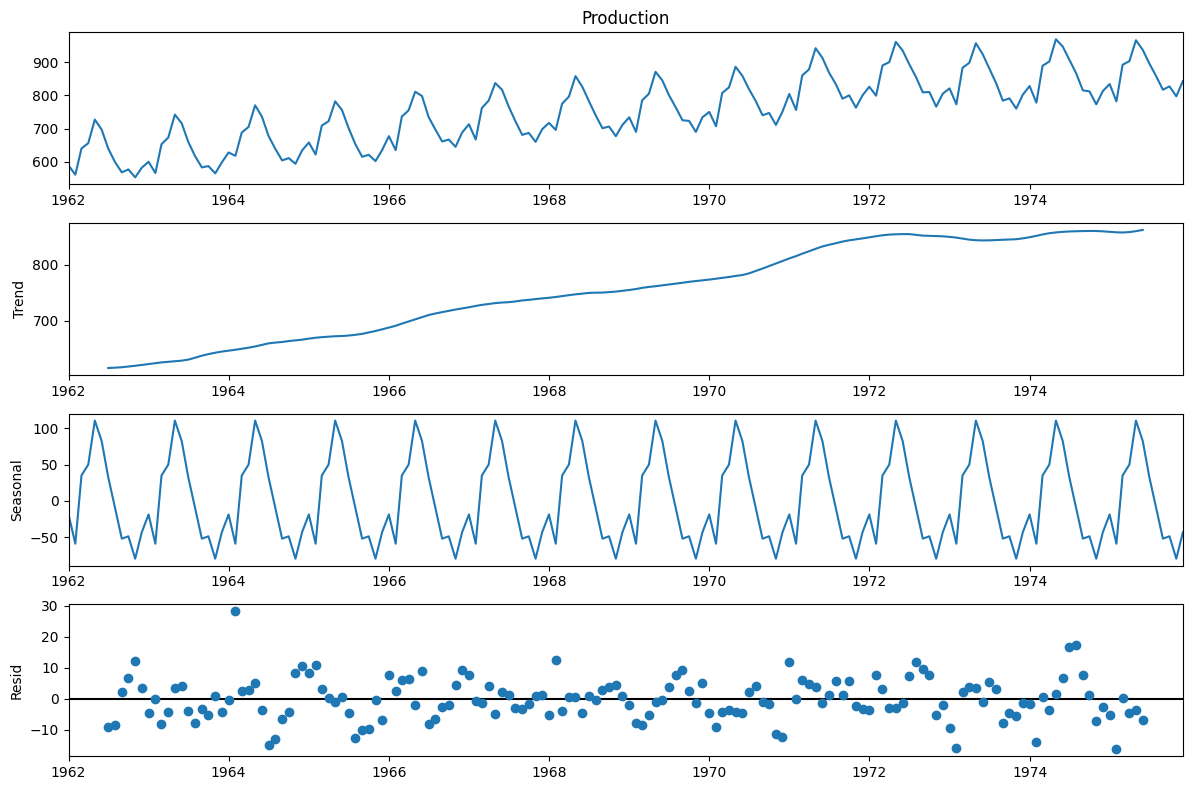

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Production'])
results.plot()

In [116]:
X_train,X_test = df[:140],df[140:]

In [117]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
scaler=MinMaxScaler()
train_scaled = scaler.fit_transform(X_train)

In [119]:
test_scaled = scaler.transform(X_test)

In [120]:
n_inputs=12
n_features=1

In [121]:
from keras.preprocessing.sequence import TimeseriesGenerator
generator = TimeseriesGenerator(train_scaled,train_scaled,length=n_inputs)

In [136]:
# X,y = generator[0]
generator[0]


(array([[[0.08823529],
         [0.01960784],
         [0.21323529],
         ...,
         [0.05882353],
         [0.        ],
         [0.07107843]],
 
        [[0.01960784],
         [0.21323529],
         [0.25245098],
         ...,
         [0.        ],
         [0.07107843],
         [0.11519608]],
 
        [[0.21323529],
         [0.25245098],
         [0.42647059],
         ...,
         [0.07107843],
         [0.11519608],
         [0.03186275]],
 
        ...,
 
        [[0.93627451],
         [0.83578431],
         [0.74019608],
         ...,
         [0.80882353],
         [0.84558824],
         [0.99019608]],
 
        [[0.83578431],
         [0.74019608],
         [0.62745098],
         ...,
         [0.84558824],
         [0.99019608],
         [0.90931373]],
 
        [[0.74019608],
         [0.62745098],
         [0.62990196],
         ...,
         [0.99019608],
         [0.90931373],
         [0.80392157]]]),
 array([[0.11519608],
        [0.03186275],
        [0.

In [123]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [124]:
model=Sequential()
model.add(LSTM(100,activation="relu",input_shape=(n_inputs,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.fit(generator,epochs=50)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.2713
Epoch 2/50
1/1 [==============================] - 0s 50ms/step - loss: 0.2567
Epoch 3/50
1/1 [==============================] - 0s 46ms/step - loss: 0.2425
Epoch 4/50
1/1 [==============================] - 0s 52ms/step - loss: 0.2282
Epoch 5/50
1/1 [==============================] - 0s 56ms/step - loss: 0.2140
Epoch 6/50
1/1 [==============================] - 0s 53ms/step - loss: 0.1997
Epoch 7/50
1/1 [==============================] - 0s 45ms/step - loss: 0.1852
Epoch 8/50
1/1 [==============================] - 0s 43ms/step - loss: 0.1706
Epoch 9/50
1/1 [==============================] - 0s 49ms/step - loss: 0.1558
Epoch 10/50
1/1 [==============================] - 0s 46ms/step - loss: 0.1407
Epoch 11/50
1/1 [==============================] - 0s 51ms/step - loss: 0.1255
Epoch 12/50
1/1 [==============================] - 0s 47ms/step - loss: 0.1100
Epoch 13/50
1/1 [==============================] - 0s 44ms/step

In [85]:
sc

array([[0.11483254],
       [0.14832536],
       [0.        ],
       [0.20095694],
       [0.32535885],
       [0.0861244 ],
       [0.61722488],
       [0.67942584],
       [1.        ],
       [0.89473684],
       [0.70813397],
       [0.51196172],
       [0.26315789],
       [0.24880383],
       [0.06220096],
       [0.25358852],
       [0.35406699],
       [0.10526316],
       [0.63157895],
       [0.68421053],
       [0.98564593],
       [0.84688995],
       [0.6507177 ],
       [0.46889952],
       [0.27272727],
       [0.32057416],
       [0.17703349],
       [0.39712919]])

In [131]:
last_train_batch = train_scaled[-n_inputs:]

In [164]:
import numpy as np
current_pred = model.predict(last_train_batch.reshape(1,n_inputs, n_features))[0][0]


1/1 [==============================] - 0s 35ms/step


In [170]:
test_preds=[]
first_eval_batch = train_scaled[-n_inputs:]
current_batch=first_eval_batch.reshape(1,n_inputs,n_features)

In [173]:
for i in range(len(test_scaled)):
  current_pred= model.predict(current_batch)[0]
  test_preds.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


In [172]:
test_predictions = []

first_eval_batch = train_scaled[-n_inputs:]
current_batch = first_eval_batch.reshape((1, n_inputs, n_features))

for i in range(len(test_scaled)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 22ms/step


In [166]:
current_batch[:,1:,:]

array([[[0.62990196],
        [0.52205882],
        [0.61764706],
        [0.65686275],
        [0.53921569],
        [0.80882353],
        [0.84558824],
        [0.99019608],
        [0.90931373],
        [0.80392157],
        [0.69607843]]])

In [175]:
!pip install prophet

In [178]:
from prophet import Prophet

In [179]:
import pandas as pd
df = pd.read_csv('/content/MaunaLoaDailyTemps.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [180]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1821 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1821 non-null   int64  
 5   Sunset   1821 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.5+ KB
